# Final Project Data Science

## Importing Libraries

In [1]:
#Import section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
from scipy import stats, special
from seaborn import pairplot, heatmap, distplot

## PROJECT PART I: Data Cleaning and Manipulation

### Importing Data

In [2]:
datafile1 = './data_elonmusk.csv'
#my_data1 = pd.read_csv(datafile1, encoding='latin1', index_col='Date', parse_dates=True) Initially used but had issues with Date Parsing
my_data1 = pd.read_csv(datafile1, encoding='latin1')
my_data1.head()

,Date,Tweet,Retweet from,User
0,41229,RT @Jon_Favreau: My Model S just arrived and I...,Jon_Favreau,elonmusk
1,41232,Just returned from a trip to London and Oxford...,NaN,elonmusk
2,41233,"Btw, I don't think Apple is doomed. Just won't...",NaN,elonmusk
3,41233,Mass. judge denies auto dealers' demand to kil...,NaN,elonmusk
4,41233,"@YOUSRC Amos's article was fair, but his edito...",NaN,elonmusk


In [3]:
datafile2 = './data_teslaproduction.csv'
#my_data2 = pd.read_csv(datafile2, index_col='SHL Date', parse_dates=True) Initially used but had issues with Date Parsing
my_data2 = pd.read_csv(datafile2, parse_dates=[0], index_col=0)
my_data2.head()

,Quarter,Actual production,Actual Delivery,Production rate per week
SHL Date,,,,
2013-02-20,Q4 2012,2750.0,NaN,400.0
2013-05-08,Q1 2013,4900.0,NaN,400.0
2013-08-07,Q2 2013,5150.0,NaN,500.0
2013-11-05,Q3 2013,5500.0,NaN,550.0
2014-02-19,Q4 2013,6892.0,6892.0,600.0


In [4]:
datafile3 = './data_teslastock.csv'
#my_data3 = pd.read_csv(datafile3, index_col='Date', parse_dates=True) Initially used but had issues with Date Parsing
my_data3 = pd.read_csv(datafile3)
my_data3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,40911.0,28.9,29.5,27.7,28.1,28.1,928100
1,40912.0,28.2,28.7,27.5,27.7,27.7,630100
2,40913.0,27.8,27.9,26.9,27.1,27.1,1005500
3,40914.0,27.2,27.8,26.4,26.9,26.9,986300
4,40917.0,27.0,27.5,26.1,27.3,27.3,897000


### Converting Date to Datetime format, then making it the Index

In [5]:
my_data1['Date'] = pd.to_datetime(my_data1['Date'],errors='coerce',unit='d',origin='1900-01-01')
my_data1.set_index('Date', inplace=True)
my_data1.head()

,Tweet,Retweet from,User
Date,,,
2012-11-18,RT @Jon_Favreau: My Model S just arrived and I...,Jon_Favreau,elonmusk
2012-11-21,Just returned from a trip to London and Oxford...,NaN,elonmusk
2012-11-22,"Btw, I don't think Apple is doomed. Just won't...",NaN,elonmusk
2012-11-22,Mass. judge denies auto dealers' demand to kil...,NaN,elonmusk
2012-11-22,"@YOUSRC Amos's article was fair, but his edito...",NaN,elonmusk


In [6]:
my_data2.index.name = 'Date'
my_data2.head()

,Quarter,Actual production,Actual Delivery,Production rate per week
Date,,,,
2013-02-20,Q4 2012,2750.0,NaN,400.0
2013-05-08,Q1 2013,4900.0,NaN,400.0
2013-08-07,Q2 2013,5150.0,NaN,500.0
2013-11-05,Q3 2013,5500.0,NaN,550.0
2014-02-19,Q4 2013,6892.0,6892.0,600.0


In [7]:
my_data3['Date'] = pd.to_datetime(my_data3['Date'],errors='coerce',unit='d',origin='1900-01-01')
my_data3.set_index('Date', inplace=True)
my_data3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-05,28.9,29.5,27.7,28.1,28.1,928100
2012-01-06,28.2,28.7,27.5,27.7,27.7,630100
2012-01-07,27.8,27.9,26.9,27.1,27.1,1005500
2012-01-08,27.2,27.8,26.4,26.9,26.9,986300
2012-01-11,27.0,27.5,26.1,27.3,27.3,897000


### Filtering Tweets based on content - Tesla, tesla

In [18]:
my_data1 = my_data1[my_data1['Tweet'].str.contains('Tesla|tesla')]

### Creating 'Tweet Count' and new table my_data1new

In [19]:
grouped = my_data1.groupby('Date') #grouping multiple tweets per day
my_data1new = grouped.agg(len)
my_data1new.rename(columns={'Tweet':'Tweet Count'}, inplace=True)
my_data1new.drop(['Retweet from', 'User'], axis=1, inplace=True)
my_data1new.head()

,Tweet Count
Date,
2012-11-18,1
2012-11-22,1
2012-12-06,1
2012-12-11,1
2012-12-13,1


### Dropping 'Quarter' from my_data2

In [20]:
my_data2.drop(['Quarter'], axis=1, inplace=True)
my_data2.head()

,Actual production,Actual Delivery,Production rate per week
Date,,,
2013-02-20,2750.0,NaN,400.0
2013-05-08,4900.0,NaN,400.0
2013-08-07,5150.0,NaN,500.0
2013-11-05,5500.0,NaN,550.0
2014-02-19,6892.0,6892.0,600.0


### Dropping 'Open', 'High', 'Low', 'Close' in my_data3 & setting column 'Adj. Close' to 'Price' from my_data3

In [21]:
my_data3.drop(['Open', 'High', 'Low', 'Close'], axis=1, inplace=True)
my_data3.columns = ['Price', 'Volume']
my_data3.head()

,Price,Volume
Date,,
2012-01-05,28.1,928100
2012-01-06,27.7,630100
2012-01-07,27.1,1005500
2012-01-08,26.9,986300
2012-01-11,27.3,897000


### Describing the datasets

In [22]:
my_data1new.describe()

,Tweet Count
count,317.000000
mean,1.511041
std,0.982781
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


In [25]:
my_data2.describe()

,Actual production,Actual Delivery,Production rate per week
count,20.000000,17.000000,10.000000
mean,14503.050000,15799.235294,795.000000
std,8152.508826,7750.812026,476.357709
min,2750.000000,6457.000000,400.000000
25%,7374.250000,9834.000000,512.500000
50%,13354.000000,14402.000000,650.000000
75%,24644.250000,22252.000000,950.000000
max,25708.000000,29870.000000,2000.000000


In [26]:
my_data3.describe()

,Price,Volume
count,1509.000000,1.509000e+03
mean,185.624453,5.307573e+06
std,97.667514,4.313891e+06
min,22.800000,3.649000e+05
25%,117.800000,2.570700e+06
50%,207.800000,4.366700e+06
75%,247.700000,6.818700e+06
max,385.000000,3.716390e+07


### Joining tables Stock Price vs Tweet Count df1; Stock Price vs Production df2

In [27]:
df1 = pd.merge(my_data3,my_data1new,how = 'left',on = 'Date') #left joining modified table 1 to table 3
df1.head()

,Price,Volume,Tweet Count
Date,,,
2012-01-05,28.1,928100,NaN
2012-01-06,27.7,630100,NaN
2012-01-07,27.1,1005500,NaN
2012-01-08,26.9,986300,NaN
2012-01-11,27.3,897000,NaN


In [28]:
df2 = pd.merge(my_data3,my_data2,how = 'left',on = 'Date') #left joining table 2 to table 3
df2.head()

,Price,Volume,Actual production,Actual Delivery,Production rate per week
Date,,,,,
2012-01-05,28.1,928100,NaN,NaN,NaN
2012-01-06,27.7,630100,NaN,NaN,NaN
2012-01-07,27.1,1005500,NaN,NaN,NaN
2012-01-08,26.9,986300,NaN,NaN,NaN
2012-01-11,27.3,897000,NaN,NaN,NaN


### Dropping rows where 'Tweet Count' is NaN  

In [29]:
df1.dropna(subset=['Tweet Count'], how='all', inplace = True) 
df1.head()

,Price,Volume,Tweet Count
Date,,,
2012-11-18,31.8,908700,1.0
2012-11-22,33.0,922500,1.0
2012-12-06,33.9,1263300,1.0
2012-12-13,35.3,1572600,1.0
2012-12-14,35.3,2063800,1.0


### 1. As Production numbers stay constant from the time they are announced to the next announcement, Forward filling 'Actual production', 'Actual Delivery' and 'Production rate per week'. 
### 2. Dropping rows where 'Actual production' & 'Actual Delivery' are both NaN.
### 3. Filling remaining NaN at beginning of 'Actual Delivery' with 0.

In [30]:
df2['Actual production'] = df2['Actual production'].fillna(method='ffill') #Step 1
df2['Actual Delivery'] = df2['Actual Delivery'].fillna(method='ffill') #Step 1
df2['Production rate per week'] = df2['Production rate per week'].fillna(method='ffill') #Step 1
df2.dropna(subset=['Actual production', 'Actual Delivery'], how='all', inplace = True) #Step 2
df2['Actual Delivery'] = df2['Actual Delivery'].fillna(0) #Step 3
df2.head()

,Price,Volume,Actual production,Actual Delivery,Production rate per week
Date,,,,,
2013-05-08,59.5,4366700,4900.0,0.0,400.0
2013-05-09,55.5,9991000,4900.0,0.0,400.0
2013-05-10,55.8,6769900,4900.0,0.0,400.0
2013-05-11,69.4,28605000,4900.0,0.0,400.0
2013-05-12,76.8,25082600,4900.0,0.0,400.0


## PROJECT PART II: Explorative Data Analysis & Modeling

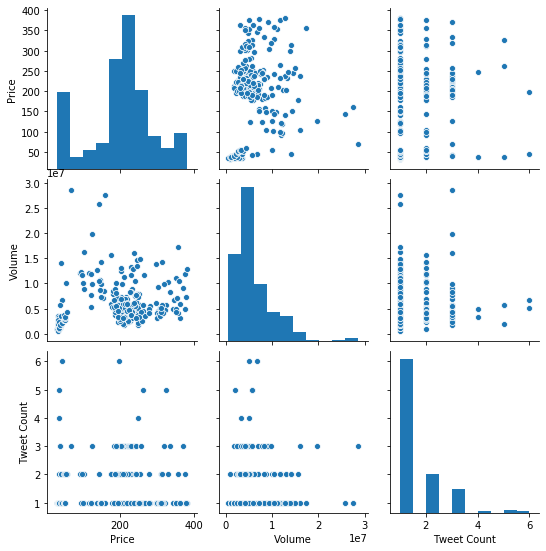

In [31]:
pairplot(df1)

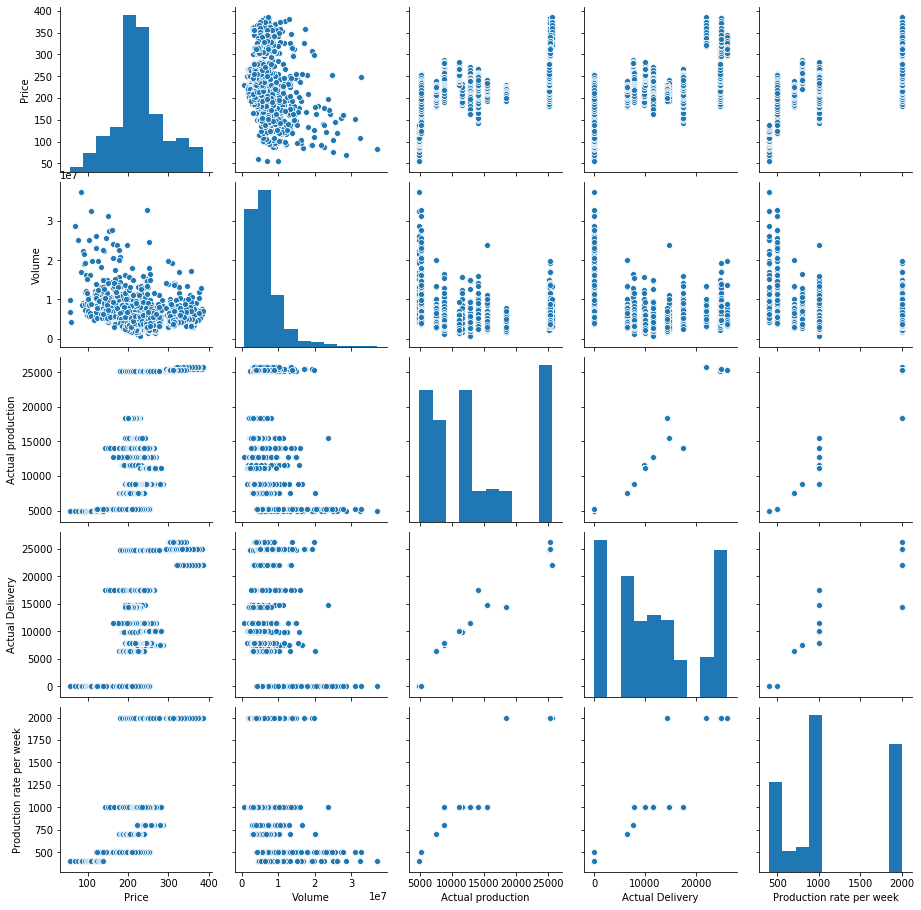

In [32]:
pairplot(df2)

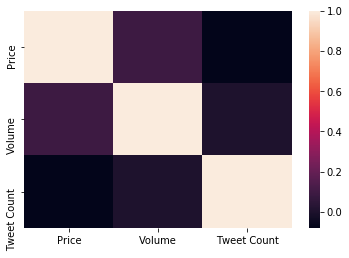

In [33]:
heatmap(df1.corr())

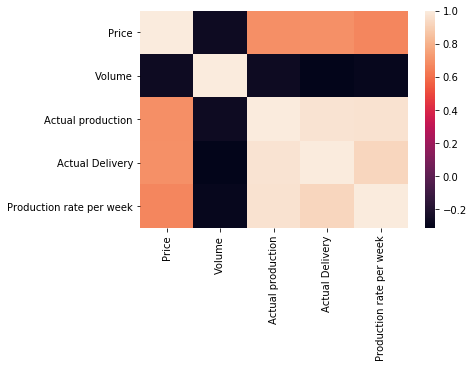

In [34]:
heatmap(df2.corr())

### Correlation Matrix

In [35]:
rho1 = df1.corr()
rho1

,Price,Volume,Tweet Count
Price,1.000000,0.093814,-0.080606
Volume,0.093814,1.000000,0.004452
Tweet Count,-0.080606,0.004452,1.000000


In [36]:
rho2 = df2.corr()
rho2

,Price,Volume,Actual production,Actual Delivery,Production rate per week
Price,1.000000,-0.263911,0.696120,0.697904,0.670174
Volume,-0.263911,1.000000,-0.264319,-0.313362,-0.287766
Actual production,0.696120,-0.264319,1.000000,0.974345,0.966754
Actual Delivery,0.697904,-0.313362,0.974345,1.000000,0.924239
Production rate per week,0.670174,-0.287766,0.966754,0.924239,1.000000


### Observations:
### 1.There looks to be a correlation between Actual Production (0.696), Actual Delivery (0.697), Production rate per week (0.670) and Price.
### 2. There is a weak correlation between Tweet count and Price (0.149).
### 3. Price looks Normally Distributed from the df1 & df2 pairplot histogram.

In [37]:
x1=df2['Production rate per week']
x2=df2['Actual production']
x3=df2['Actual Delivery']
y1=df2['Price']

x4=df1['Tweet Count']
y2=df1['Price']

### Price vs Production rate per week

Text(0, 0.5, 'Price')

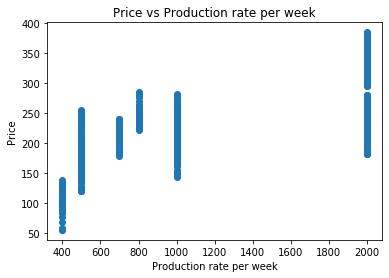

In [38]:
plt.scatter(x1,y1)
plt.title("Price vs Production rate per week")
plt.xlabel("Production rate per week")
plt.ylabel("Price")

In [39]:
beta_1 = np.cov(y1, x1)[0,1] / np.cov(y1,x1)[1,1]
beta_0 = np.mean(y1) - beta_1 * np.mean(x1)
print("beta_0 = " + str(beta_0))
print("beta_1 = " + str(beta_1))

# add the new yhat to the dataframe
df2['y1hat_1'] = beta_0 + beta_1 * df2['Production rate per week']


# Compute the sum of squares
print("Sum of squared errors = " + str(sum((df2['Price'] - df2['y1hat_1'])**2)))
df2.head()

beta_0 = 147.5869762022876
beta_1 = 0.06989406818504969
Sum of squared errors = 2416785.3961032396


,Price,Volume,Actual production,Actual Delivery,Production rate per week,y1hat_1
Date,,,,,,
2013-05-08,59.5,4366700,4900.0,0.0,400.0,175.544603
2013-05-09,55.5,9991000,4900.0,0.0,400.0,175.544603
2013-05-10,55.8,6769900,4900.0,0.0,400.0,175.544603
2013-05-11,69.4,28605000,4900.0,0.0,400.0,175.544603
2013-05-12,76.8,25082600,4900.0,0.0,400.0,175.544603


Text(0, 0.5, 'Predicted Price')

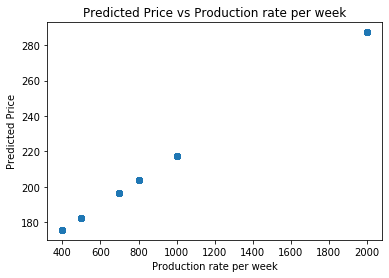

In [40]:
# Plot the predicted graph
plt.scatter(x1,df2['y1hat_1'])
plt.title("Predicted Price vs Production rate per week")
plt.xlabel("Production rate per week")
plt.ylabel("Predicted Price")

### Price vs Actual Production

Text(0, 0.5, 'Price')

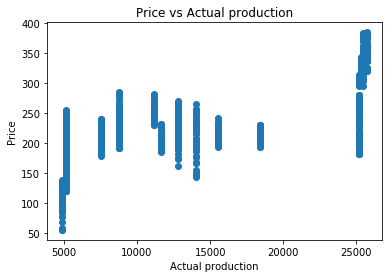

In [41]:
plt.scatter(x2,y1)
plt.title("Price vs Actual production")
plt.xlabel("Actual production")
plt.ylabel("Price")

In [42]:
beta_1 = np.cov(y1, x2)[0,1] / np.cov(y1,x2)[1,1]
beta_0 = np.mean(y1) - beta_1 * np.mean(x2)
print("beta_0 = " + str(beta_0))
print("beta_1 = " + str(beta_1))

# add the new yhat to the dataframe
df2['y1hat_2'] = beta_0 + beta_1 * df2['Actual production']

# Compute the sum of squares
print("Sum of squared errors = " + str(sum((df2['Price'] - df2['y1hat_2'])**2)))

df2.head()

beta_0 = 150.4182232122385
beta_1 = 0.0056306739595030275
Sum of squared errors = 2261260.2671347833


,Price,Volume,Actual production,Actual Delivery,Production rate per week,y1hat_1,y1hat_2
Date,,,,,,,
2013-05-08,59.5,4366700,4900.0,0.0,400.0,175.544603,178.008526
2013-05-09,55.5,9991000,4900.0,0.0,400.0,175.544603,178.008526
2013-05-10,55.8,6769900,4900.0,0.0,400.0,175.544603,178.008526
2013-05-11,69.4,28605000,4900.0,0.0,400.0,175.544603,178.008526
2013-05-12,76.8,25082600,4900.0,0.0,400.0,175.544603,178.008526


Text(0, 0.5, 'Predicted Price')

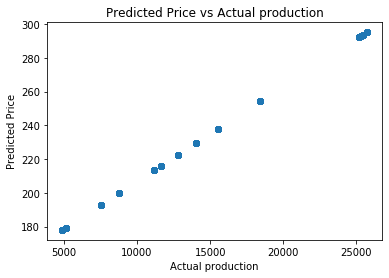

In [43]:
# Plot the predicted graph
plt.scatter(x2,df2['y1hat_2'])
plt.title("Predicted Price vs Actual production")
plt.xlabel("Actual production")
plt.ylabel("Predicted Price")

### Price vs Actual Delivery

Text(0, 0.5, 'Price')

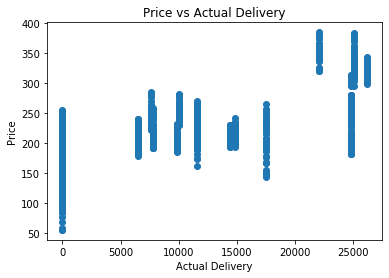

In [44]:
plt.scatter(x3,y1)
plt.title("Price vs Actual Delivery")
plt.xlabel("Actual Delivery")
plt.ylabel("Price")

In [45]:
beta_1 = np.cov(y1, x3)[0,1] / np.cov(y1,x3)[1,1]
beta_0 = np.mean(y1) - beta_1 * np.mean(x3)
print("beta_0 = " + str(beta_0))
print("beta_1 = " + str(beta_1))

# add the new yhat to the dataframe
df2['y1hat_3'] = beta_0 + beta_1 * df2['Actual Delivery']

# Compute the sum of squares
print("Sum of squared errors = " + str(sum((df2['Price'] - df2['y1hat_3'])**2)))
df2.head()

beta_0 = 170.22732887179532
beta_1 = 0.00485812747778017
Sum of squared errors = 2250349.556999745


,Price,Volume,Actual production,Actual Delivery,Production rate per week,y1hat_1,y1hat_2,y1hat_3
Date,,,,,,,,
2013-05-08,59.5,4366700,4900.0,0.0,400.0,175.544603,178.008526,170.227329
2013-05-09,55.5,9991000,4900.0,0.0,400.0,175.544603,178.008526,170.227329
2013-05-10,55.8,6769900,4900.0,0.0,400.0,175.544603,178.008526,170.227329
2013-05-11,69.4,28605000,4900.0,0.0,400.0,175.544603,178.008526,170.227329
2013-05-12,76.8,25082600,4900.0,0.0,400.0,175.544603,178.008526,170.227329


Text(0, 0.5, 'Predicted Price')

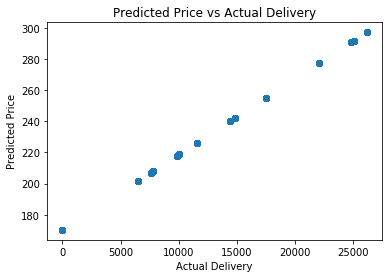

In [46]:
# Plot the predicted graph
plt.scatter(x3,df2['y1hat_3'])
plt.title("Predicted Price vs Actual Delivery")
plt.xlabel("Actual Delivery")
plt.ylabel("Predicted Price")

### Price vs Tweet Count

Text(0, 0.5, 'Price')

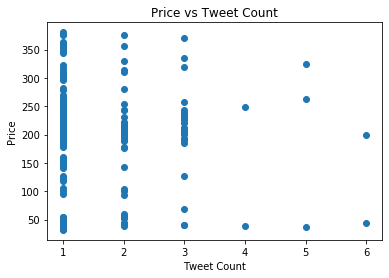

In [47]:
plt.scatter(x4,y2)
plt.title("Price vs Tweet Count")
plt.xlabel("Tweet Count")
plt.ylabel("Price")

In [48]:
beta_1 = np.cov(y2, x4)[0,1] / np.cov(y2,x4)[1,1]
beta_0 = np.mean(y2) - beta_1 * np.mean(x4)
print("beta_0 = " + str(beta_0))
print("beta_1 = " + str(beta_1))

# add the new yhat to the dataframe
df1['y2hat_1'] = beta_0 + beta_1 * df1['Tweet Count']

# Compute the sum of squares
print("Sum of squared errors = " + str(sum((df1['Price'] - df1['y2hat_1'])**2)))
df1.head()

beta_0 = 215.35658423889797
beta_1 = -7.57615299050227
Sum of squared errors = 1731214.8541576113


,Price,Volume,Tweet Count,y2hat_1
Date,,,,
2012-11-18,31.8,908700,1.0,207.780431
2012-11-22,33.0,922500,1.0,207.780431
2012-12-06,33.9,1263300,1.0,207.780431
2012-12-13,35.3,1572600,1.0,207.780431
2012-12-14,35.3,2063800,1.0,207.780431


Text(0, 0.5, 'Predicted Price')

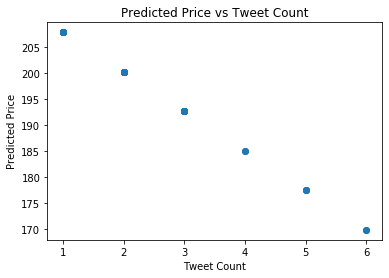

In [49]:
# Plot the predicted graph
plt.scatter(x4,df1['y2hat_1'])
plt.title("Predicted Price vs Tweet Count")
plt.xlabel("Tweet Count")
plt.ylabel("Predicted Price")

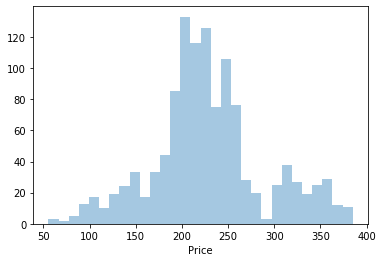

In [50]:
distplot(y1, kde = False)

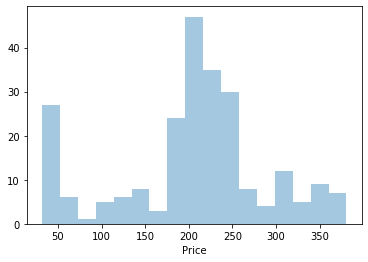

In [51]:
distplot(y2, kde = False)

### Linear Regression with `Statsmodels`

In [52]:
test1 = smf.ols('Price ~ Q("Actual production") + Q("Actual Delivery") + np.power(Q("Production rate per week"), 2)', data=df2).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     385.1
Date:                Fri, 10 Jul 2020   Prob (F-statistic):          5.96e-174
Time:                        11:41:00   Log-Likelihood:                -6091.3
No. Observations:                1174   AIC:                         1.219e+04
Df Residuals:                    1170   BIC:                         1.221e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                    143.5183      6.254     22.948      0.000     131.248     155.789
Q("Actual production")                         0.0065      0.001      4.623      0.000       0.004       0.009
Q("Actual Delivery")                           0.0011      0.001      1.383      0.167      -0.000       0.003
np.power(Q("Production rate per week"), 2) -1.082e-05   3.29e-06     -3.290      0.001   -1.73e-05   -4.37e-06
==============================================================================
Omnibus:                       27.507   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.084
Skew:                          -0.340   Prob(JB):                     1.31e-06
Kurtosis:                       2.698   Cond. No.                     1.14e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
test2 = smf.ols('Price ~  Q("Tweet Count")', data=df1).fit()
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.537
Date:                Fri, 10 Jul 2020   Prob (F-statistic):              0.216
Time:                        11:41:00   Log-Likelihood:                -1390.5
No. Observations:                 237   AIC:                             2785.
Df Residuals:                     235   BIC:                             2792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          215.3566     10.740     20.051      0.000     194.197     236.516
Q("Tweet Count")    -7.5762      6.111     -1.240      0.216     -19.616       4.464
==============================================================================
Omnibus:                        5.660   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                5.778
Skew:                          -0.378   Prob(JB):                       0.0556
Kurtosis:                       2.884   Cond. No.                         4.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## PROJECT PART III: Model Validation

### We can use Shapiro test to determine if the Price Histogram is Normally distributed, with significance level $0.01$

In [54]:
stats.shapiro(y1)

(0.972775399684906, 4.634121997812782e-14)

In [55]:
stats.shapiro(y2)

(0.9331221580505371, 6.651008632729827e-09)

### Since the p-value for both y1 & y2 <<<<<<<  0.01, we reject the null hypothesis that y1 & y2 are normally distributed. 